<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        Import Dataset <br>
    </p>
</div>


In [14]:
import kagglehub
import os
import shutil
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        Download Dataset from <a href = "https://www.kaggle.com/datasets/arjuntejaswi/plant-village"> Kaggle </a><br>
    </p>
</div>


In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        Unzip Folder<br>
    </p>
</div>


In [3]:
!kaggle datasets download -d arjuntejaswi/plant-village
!unzip plant-village.zip -d plant_village

Streaming output truncated to the last 5000 lines.
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plant_village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        Dataset Parameters<br>
    </p>
</div>


In [5]:
dataset_path = "/content/plant_village/PlantVillage"
IMAGE_SIZE = 256
BATCH_SIZE = 32

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        Load dataset<br>
    </p>
</div>


In [8]:
potato_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'],
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names = potato_data.class_names

In [13]:
for image_batch, labels_batch in potato_data:
    print(image_batch[0].shape)
    break

(256, 256, 3)


<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        visualize Image from Each Classes<br>
    </p>
</div>


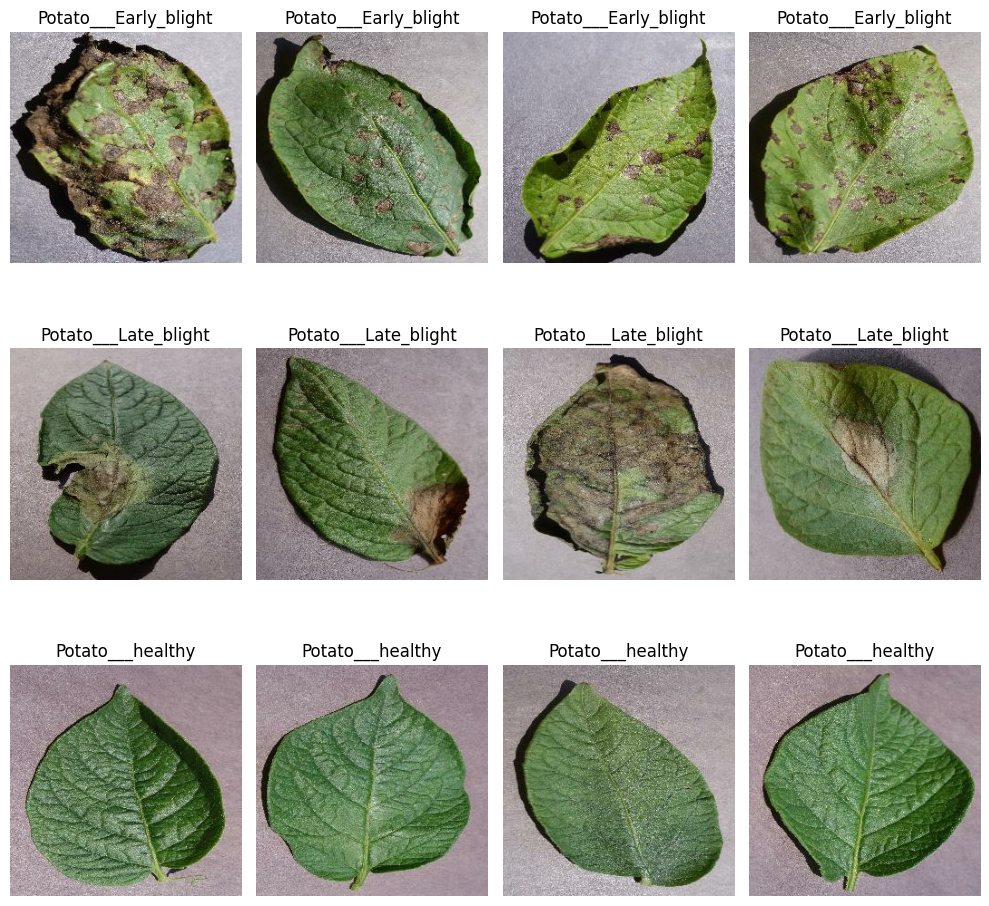

In [18]:
images_by_label = {label: [] for label in range(len(class_names))}

for image_batch, label_batch in potato_data:
    for image, label in zip(image_batch, label_batch):
        if len(images_by_label[label.numpy()]) < 4:
            images_by_label[label.numpy()].append(image)

        if all(len(images) == 4 for images in images_by_label.values()):
            break
    if all(len(images) == 4 for images in images_by_label.values()):
        break

plt.figure(figsize=(10, 10))
for label, images in images_by_label.items():
    for i, image in enumerate(images):
        ax = plt.subplot(len(class_names), 4, label * 4 + i + 1)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(class_names[label])
        plt.axis("off")

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        Data splitting
    </p>
</div>


### <b><i> Splitting Criteria:
        - Train data size: 80%
        - Test data size: 10%
        - Validation data size: 10%
</b></i>

In [21]:
for image_batch, labels_batch in potato_data:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [22]:
len(potato_data)

68

In [27]:
int(len(potato_data) * .8)

54

In [33]:
train_data = potato_data.take(54)
test_data = potato_data.skip(54)

In [34]:
len(train_data), len(test_data)

(54, 14)

In [37]:
int(len(potato_data) * .1)

6

In [38]:
val_data = test_data.take(6)
len(val_data)

6

In [39]:
test_data = test_data.skip(6)
len(test_data)

8

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        Data splitting function
    </p>
</div>


In [46]:
def get_splitted_dataset(potato_data, train_split = .8, val_split = .1, test_split = .1, shuffle=False, shuffle_size=10000):

  assert (train_split + val_split + test_split) == 1

  dataset_size = len(potato_data)

  train_size = int(dataset_size * train_split)
  val_size = int(dataset_size * val_split)
  test_size = int(dataset_size * test_split)

  if shuffle:
    potato_data = potato_data.shuffle(shuffle_size, seed=12)

  train_data = potato_data.take(train_size)
  test_data = potato_data.skip(train_size).take(test_size)
  val_data = potato_data.skip(train_size).skip(test_size)

  return train_data, test_data, val_data

<div style="text-align: center;">
    <p style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
              color: #fff; 
              font-size: 1.8em; 
              font-family: 'Helvetica', sans-serif; 
              text-align: center; 
              border-radius: 15px; 
              border: 3px solid #ff7e5f; 
              display: inline-block; 
              padding: 15px 25px; 
              margin: 20px auto; 
              line-height: 1.5; 
              font-weight: bold; 
              box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
              text-transform: uppercase; 
              letter-spacing: 2px;">
        Split dataset
    </p>
</div>


In [47]:
train_data, test_data, val_data = get_splitted_dataset(potato_data)

In [48]:
len(train_data), len(test_data), len(val_data)

(54, 6, 8)

## <b><i>Cache, Shuffle, and Prefetch the Dataset

In [50]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [51]:
len(train_data), len(test_data), len(val_data)

(54, 6, 8)